## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1          X2        X3        X4         Y
0  17.047387  565.542171  0.351812  7.954139  1.524084
1  18.867473  480.007525  0.286854  5.766906  1.480462
2  48.958046  187.436136  0.589298  5.741010  1.052049
3  80.478225  762.233583  0.165532  9.628729  0.984987
4  38.458503  961.760331  0.611613  2.356624  1.346125


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.02),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 0.84555 | train_mse: 4.49934 | train_mae: 1.59764 |  0:00:00s
epoch 1  | loss: 0.71294 | train_mse: 1.83418 | train_mae: 1.07535 |  0:00:00s


epoch 2  | loss: 0.67608 | train_mse: 2.50675 | train_mae: 1.1707  |  0:00:00s
epoch 3  | loss: 0.60668 | train_mse: 2.15907 | train_mae: 1.06494 |  0:00:00s


epoch 4  | loss: 0.4072  | train_mse: 2.76089 | train_mae: 1.19863 |  0:00:00s
epoch 5  | loss: 0.44783 | train_mse: 1.97279 | train_mae: 1.01958 |  0:00:00s
epoch 6  | loss: 0.30761 | train_mse: 2.12331 | train_mae: 1.00885 |  0:00:01s


epoch 7  | loss: 0.42506 | train_mse: 3.37137 | train_mae: 1.21374 |  0:00:01s
epoch 8  | loss: 0.36227 | train_mse: 3.32127 | train_mae: 1.15474 |  0:00:01s


epoch 9  | loss: 0.33281 | train_mse: 2.4216  | train_mae: 0.95808 |  0:00:01s
epoch 10 | loss: 0.32044 | train_mse: 1.12334 | train_mae: 0.7081  |  0:00:01s
epoch 11 | loss: 0.39439 | train_mse: 0.67671 | train_mae: 0.60747 |  0:00:01s


epoch 12 | loss: 0.48226 | train_mse: 0.93533 | train_mae: 0.69029 |  0:00:01s
epoch 13 | loss: 0.30606 | train_mse: 1.49754 | train_mae: 0.82169 |  0:00:01s
epoch 14 | loss: 0.29914 | train_mse: 1.35814 | train_mae: 0.78251 |  0:00:01s


epoch 15 | loss: 0.30957 | train_mse: 0.83908 | train_mae: 0.64171 |  0:00:02s
epoch 16 | loss: 0.23384 | train_mse: 0.91985 | train_mae: 0.70216 |  0:00:02s


epoch 17 | loss: 0.33067 | train_mse: 0.47286 | train_mae: 0.54586 |  0:00:02s
epoch 18 | loss: 0.27713 | train_mse: 0.413   | train_mae: 0.49587 |  0:00:02s


epoch 19 | loss: 0.18001 | train_mse: 0.42091 | train_mae: 0.48935 |  0:00:02s
epoch 20 | loss: 0.218   | train_mse: 0.46227 | train_mae: 0.50086 |  0:00:02s


epoch 21 | loss: 0.29416 | train_mse: 0.27828 | train_mae: 0.41108 |  0:00:02s
epoch 22 | loss: 0.11981 | train_mse: 0.21312 | train_mae: 0.35441 |  0:00:02s


epoch 23 | loss: 0.15847 | train_mse: 0.19079 | train_mae: 0.33329 |  0:00:02s
epoch 24 | loss: 0.15536 | train_mse: 0.24762 | train_mae: 0.36508 |  0:00:02s


epoch 25 | loss: 0.2918  | train_mse: 0.21604 | train_mae: 0.3551  |  0:00:03s
epoch 26 | loss: 0.15495 | train_mse: 0.15843 | train_mae: 0.3002  |  0:00:03s


epoch 27 | loss: 0.15726 | train_mse: 0.16209 | train_mae: 0.29183 |  0:00:03s
epoch 28 | loss: 0.16011 | train_mse: 0.16392 | train_mae: 0.30388 |  0:00:03s


epoch 29 | loss: 0.28839 | train_mse: 0.16366 | train_mae: 0.29128 |  0:00:03s
epoch 30 | loss: 0.24341 | train_mse: 0.14531 | train_mae: 0.29274 |  0:00:03s
epoch 31 | loss: 0.13655 | train_mse: 0.15933 | train_mae: 0.29214 |  0:00:03s


epoch 32 | loss: 0.1559  | train_mse: 0.14788 | train_mae: 0.26699 |  0:00:03s
epoch 33 | loss: 0.21878 | train_mse: 0.1444  | train_mae: 0.26527 |  0:00:03s


epoch 34 | loss: 0.16478 | train_mse: 0.22218 | train_mae: 0.31179 |  0:00:04s
epoch 35 | loss: 0.13016 | train_mse: 0.19188 | train_mae: 0.28626 |  0:00:04s


epoch 36 | loss: 0.25821 | train_mse: 0.17462 | train_mae: 0.26759 |  0:00:04s


epoch 37 | loss: 0.09512 | train_mse: 0.18958 | train_mae: 0.27729 |  0:00:04s
epoch 38 | loss: 0.18676 | train_mse: 0.14586 | train_mae: 0.25609 |  0:00:04s


epoch 39 | loss: 0.07501 | train_mse: 0.15133 | train_mae: 0.26705 |  0:00:04s
epoch 40 | loss: 0.08231 | train_mse: 0.14209 | train_mae: 0.26934 |  0:00:05s
epoch 41 | loss: 0.07363 | train_mse: 0.16279 | train_mae: 0.28347 |  0:00:05s


epoch 42 | loss: 0.08543 | train_mse: 0.2176  | train_mae: 0.32206 |  0:00:05s
epoch 43 | loss: 0.13241 | train_mse: 0.14455 | train_mae: 0.26841 |  0:00:05s


epoch 44 | loss: 0.28216 | train_mse: 0.09273 | train_mae: 0.22833 |  0:00:05s
epoch 45 | loss: 0.12951 | train_mse: 0.13269 | train_mae: 0.26785 |  0:00:05s
epoch 46 | loss: 0.12099 | train_mse: 0.19164 | train_mae: 0.29985 |  0:00:05s


epoch 47 | loss: 0.11089 | train_mse: 0.2041  | train_mae: 0.30324 |  0:00:06s
epoch 48 | loss: 0.22127 | train_mse: 0.14467 | train_mae: 0.25775 |  0:00:06s


epoch 49 | loss: 0.08762 | train_mse: 0.14978 | train_mae: 0.24809 |  0:00:06s
epoch 50 | loss: 0.17034 | train_mse: 0.08533 | train_mae: 0.21403 |  0:00:06s


epoch 51 | loss: 0.11184 | train_mse: 0.06539 | train_mae: 0.19945 |  0:00:06s
epoch 52 | loss: 0.08171 | train_mse: 0.08062 | train_mae: 0.22156 |  0:00:06s
epoch 53 | loss: 0.09452 | train_mse: 0.13522 | train_mae: 0.26389 |  0:00:06s


epoch 54 | loss: 0.09091 | train_mse: 0.13917 | train_mae: 0.2539  |  0:00:06s
epoch 55 | loss: 0.11825 | train_mse: 0.08196 | train_mae: 0.21466 |  0:00:07s


epoch 56 | loss: 0.10563 | train_mse: 0.08312 | train_mae: 0.21748 |  0:00:07s
epoch 57 | loss: 0.13318 | train_mse: 0.0844  | train_mae: 0.21782 |  0:00:07s


epoch 58 | loss: 0.11484 | train_mse: 0.06736 | train_mae: 0.20019 |  0:00:07s
epoch 59 | loss: 0.11478 | train_mse: 0.06468 | train_mae: 0.19507 |  0:00:07s


epoch 60 | loss: 0.32699 | train_mse: 0.08947 | train_mae: 0.22699 |  0:00:07s
epoch 61 | loss: 0.18493 | train_mse: 0.13087 | train_mae: 0.25953 |  0:00:07s


epoch 62 | loss: 0.17359 | train_mse: 0.07464 | train_mae: 0.21087 |  0:00:07s
epoch 63 | loss: 0.06592 | train_mse: 0.11001 | train_mae: 0.23794 |  0:00:08s


epoch 64 | loss: 0.09925 | train_mse: 0.17412 | train_mae: 0.28085 |  0:00:08s
epoch 65 | loss: 0.44903 | train_mse: 0.25484 | train_mae: 0.31631 |  0:00:08s


epoch 66 | loss: 0.14586 | train_mse: 0.09567 | train_mae: 0.22274 |  0:00:08s
epoch 67 | loss: 0.07236 | train_mse: 0.04957 | train_mae: 0.17454 |  0:00:08s
epoch 68 | loss: 0.27822 | train_mse: 0.10659 | train_mae: 0.22167 |  0:00:08s


epoch 69 | loss: 0.15417 | train_mse: 0.08007 | train_mae: 0.20505 |  0:00:08s
epoch 70 | loss: 0.15761 | train_mse: 0.05437 | train_mae: 0.17846 |  0:00:08s
epoch 71 | loss: 0.0614  | train_mse: 0.05989 | train_mae: 0.19023 |  0:00:08s


epoch 72 | loss: 0.08442 | train_mse: 0.04964 | train_mae: 0.18075 |  0:00:08s
epoch 73 | loss: 0.06399 | train_mse: 0.05635 | train_mae: 0.18172 |  0:00:09s
epoch 74 | loss: 0.05616 | train_mse: 0.12979 | train_mae: 0.23616 |  0:00:09s


epoch 75 | loss: 0.12637 | train_mse: 0.09823 | train_mae: 0.22421 |  0:00:09s
epoch 76 | loss: 0.2119  | train_mse: 0.11426 | train_mae: 0.21974 |  0:00:09s


epoch 77 | loss: 0.12687 | train_mse: 0.12067 | train_mae: 0.22272 |  0:00:09s


epoch 78 | loss: 0.14918 | train_mse: 0.12712 | train_mae: 0.23108 |  0:00:09s
epoch 79 | loss: 0.15301 | train_mse: 0.15147 | train_mae: 0.24628 |  0:00:09s
epoch 80 | loss: 0.10248 | train_mse: 0.16618 | train_mae: 0.25504 |  0:00:09s
epoch 81 | loss: 0.13454 | train_mse: 0.166   | train_mae: 0.26193 |  0:00:09s


epoch 82 | loss: 0.13807 | train_mse: 0.17691 | train_mae: 0.27529 |  0:00:10s
epoch 83 | loss: 0.11271 | train_mse: 0.25194 | train_mae: 0.31218 |  0:00:10s


epoch 84 | loss: 0.11482 | train_mse: 0.2663  | train_mae: 0.31699 |  0:00:10s
epoch 85 | loss: 0.09423 | train_mse: 0.26772 | train_mae: 0.31131 |  0:00:10s


epoch 86 | loss: 0.25382 | train_mse: 0.242   | train_mae: 0.30025 |  0:00:10s
epoch 87 | loss: 0.08033 | train_mse: 0.1678  | train_mae: 0.2615  |  0:00:10s


epoch 88 | loss: 0.15274 | train_mse: 0.15193 | train_mae: 0.24133 |  0:00:10s
epoch 89 | loss: 0.19426 | train_mse: 0.12703 | train_mae: 0.22414 |  0:00:11s


epoch 90 | loss: 0.1982  | train_mse: 0.12076 | train_mae: 0.23257 |  0:00:11s
epoch 91 | loss: 0.18608 | train_mse: 0.13514 | train_mae: 0.24409 |  0:00:11s


epoch 92 | loss: 0.1577  | train_mse: 0.14681 | train_mae: 0.24432 |  0:00:11s
epoch 93 | loss: 0.08905 | train_mse: 0.13506 | train_mae: 0.25133 |  0:00:11s


epoch 94 | loss: 0.17087 | train_mse: 0.12132 | train_mae: 0.2416  |  0:00:11s
epoch 95 | loss: 0.23704 | train_mse: 0.07982 | train_mae: 0.2073  |  0:00:11s


epoch 96 | loss: 0.09902 | train_mse: 0.10356 | train_mae: 0.2234  |  0:00:11s
epoch 97 | loss: 0.28033 | train_mse: 0.14312 | train_mae: 0.26213 |  0:00:12s


epoch 98 | loss: 0.11576 | train_mse: 0.12715 | train_mae: 0.24133 |  0:00:12s
epoch 99 | loss: 0.14202 | train_mse: 0.1239  | train_mae: 0.24395 |  0:00:12s


epoch 100| loss: 0.09494 | train_mse: 0.1657  | train_mae: 0.26612 |  0:00:12s
epoch 101| loss: 0.12362 | train_mse: 0.12668 | train_mae: 0.23662 |  0:00:12s


epoch 102| loss: 0.25004 | train_mse: 0.09452 | train_mae: 0.21113 |  0:00:12s
epoch 103| loss: 0.25987 | train_mse: 0.07925 | train_mae: 0.21059 |  0:00:12s
epoch 104| loss: 0.18071 | train_mse: 0.07203 | train_mae: 0.20599 |  0:00:12s


epoch 105| loss: 0.14652 | train_mse: 0.06902 | train_mae: 0.20069 |  0:00:13s
epoch 106| loss: 0.189   | train_mse: 0.05532 | train_mae: 0.18012 |  0:00:13s


epoch 107| loss: 0.14636 | train_mse: 0.05457 | train_mae: 0.17597 |  0:00:13s


epoch 108| loss: 0.11464 | train_mse: 0.06828 | train_mae: 0.19664 |  0:00:13s
epoch 109| loss: 0.07388 | train_mse: 0.09128 | train_mae: 0.22366 |  0:00:13s


epoch 110| loss: 0.15869 | train_mse: 0.17775 | train_mae: 0.28346 |  0:00:14s
epoch 111| loss: 0.26622 | train_mse: 0.2914  | train_mae: 0.33965 |  0:00:14s


epoch 112| loss: 0.17443 | train_mse: 0.2259  | train_mae: 0.29463 |  0:00:14s
epoch 113| loss: 0.26362 | train_mse: 0.15897 | train_mae: 0.25508 |  0:00:14s


epoch 114| loss: 0.19857 | train_mse: 0.1174  | train_mae: 0.22884 |  0:00:14s


epoch 115| loss: 0.15958 | train_mse: 0.10133 | train_mae: 0.21347 |  0:00:14s
epoch 116| loss: 0.14084 | train_mse: 0.12478 | train_mae: 0.22785 |  0:00:15s


epoch 117| loss: 0.05961 | train_mse: 0.16884 | train_mae: 0.26869 |  0:00:15s

Early stopping occurred at epoch 117 with best_epoch = 67 and best_train_mae = 0.17454
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

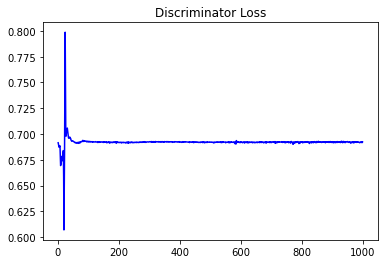

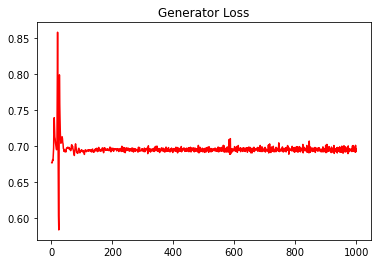

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.326001514190773


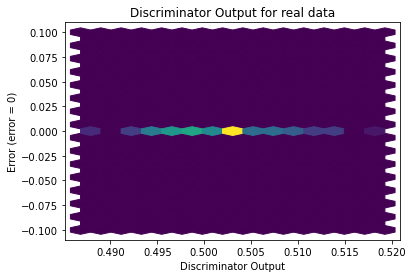

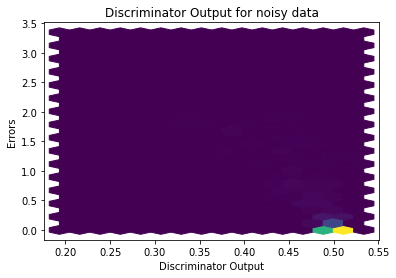

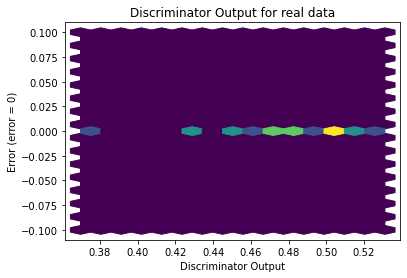

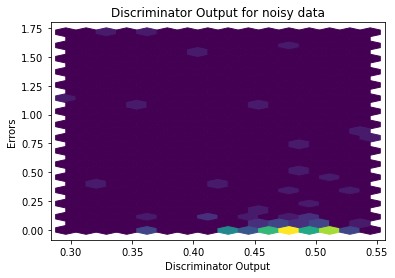

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


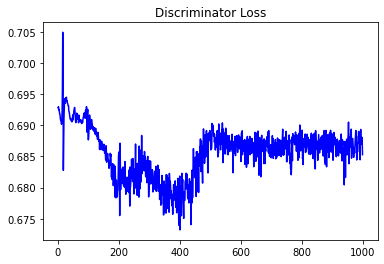

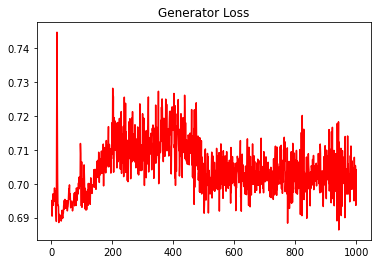

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.18952457214234442


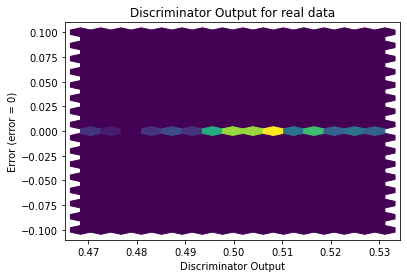

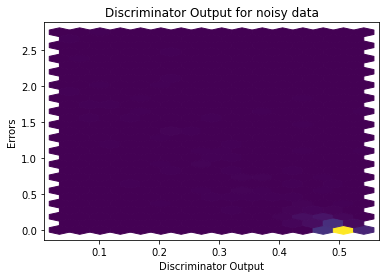

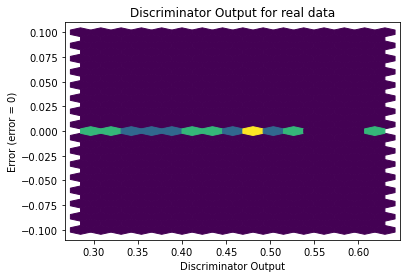

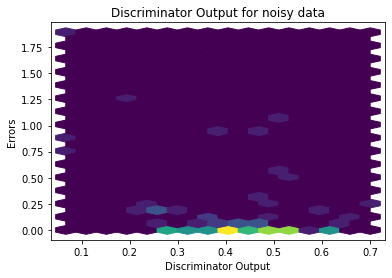

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.2011]], requires_grad=True)
